In [1]:
import torch

from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video

/home/samuel/miniforge3/envs/vfx-inspect/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def custom_repr(self):
    return f'{{Tensor:{tuple(self.shape)}}} {original_repr(self)}'

torch.set_printoptions(sci_mode=False)
original_repr = torch.Tensor.__repr__
torch.Tensor.__repr__ = custom_repr

In [3]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda:1" if torch.cuda.is_available() else "cpu")

pipe = StableVideoDiffusionPipeline.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16, variant="fp16"
).to(device)

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  9.24it/s]


In [4]:
pipe.enable_model_cpu_offload()

In [5]:
pipe

StableVideoDiffusionPipeline {
  "_class_name": "StableVideoDiffusionPipeline",
  "_diffusers_version": "0.31.0.dev0",
  "_name_or_path": "stabilityai/stable-video-diffusion-img2vid-xt",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    "transformers",
    "CLIPVisionModelWithProjection"
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "unet": [
    "diffusers",
    "UNetSpatioTemporalConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKLTemporalDecoder"
  ]
}

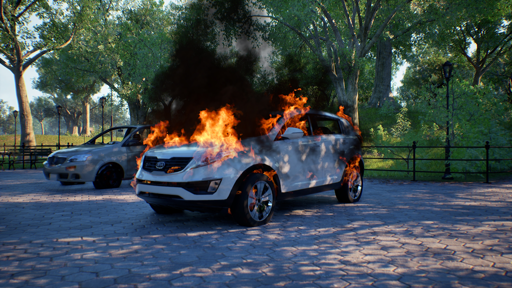

In [6]:

# Load the conditioning image
image = load_image("../images/fire-car-11-700.png")
image = image.resize((1024, 576))
image.resize((512, 288))    # convience for previewing

In [7]:
generator = torch.manual_seed(42)
frames = pipe(image, decode_chunk_size=8, generator=generator).frames[0]

100%|██████████| 25/25 [01:26<00:00,  3.45s/it]


In [8]:
print(len(frames), frames)

25 [<PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F5210>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F55A0>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F47C0>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F57E0>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F5780>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F5810>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F5840>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F5870>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F58A0>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F58D0>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F5900>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F5930>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F5960>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F5990>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x7FE5435F59C0>, <PIL.I

In [15]:
export_to_video(frames, "../results/fire-car-11-700-32bit-cpu.mp4", fps=7)

'../results/fire-car-11-700.mp4'